In [44]:
import numpy as np
import pandas as pd
import researchpy as rp
from scipy.stats import t
pd.set_option('display.max_columns', 30) # set so can see all columns of the DataFrame

### Hypothesis Tesing
We will look at two hypothesis test, each with $\alpha = .025$:  


1. Is the accurracy of SMOTE and Class_Weight are same?

2. Is the accurracy of SMOTE and Class_Weight are Different?


Aside: This $\alpha$ level is equivalent to $\alpha = .05$ and then applying the [Bonferonni correction](https://en.wikipedia.org/wiki/Bonferroni_correction).

In [5]:
# Import the data
df = pd.read_csv("./testing_ouptut.csv",low_memory=False) 

In [50]:
df['Pred_50_Match']=0
df['Pred_SMOTE_50_Match']=0
df.loc[df['Pred_50']==df['OUTPUT'],'Pred_50_Match']=1
df.loc[df['Pred_Smote_50']==df['OUTPUT'],'Pred_SMOTE_50_Match']=1

In [51]:
rp.summary_cat(df[['Pred_50_Match', 'Pred_SMOTE_50_Match']])

,Variable,Outcome,Count,Percent
0,Pred_50_Match,1,266962,99.10
1,,0,2412,0.90
2,Pred_SMOTE_50_Match,1,260941,96.87
3,,0,8433,3.13


In [59]:
invalid=df[df['OUTPUT']==0]

### McNemar Test
McNemar's Test is a statistical test used on paired nominal data.


It is applied to 2x2 contigency tables with a dichotomous trail, with matched pairs of subjects, to determine whether the row and column marginal frequencies are equal (mariginal homogeneity)

In [62]:
table, res = rp.crosstab(invalid['Pred_50_Match'], invalid['Pred_SMOTE_50_Match'], test= 'mcnemar')

In [63]:
table

Pred_SMOTE_50_Match          
                                0    1  All
Pred_50_Match                              
0                              78    6   84
1                              59  295  354
All                           137  301  438

In [64]:
res

,McNemar,results
0,McNemar's Chi-square ( 1.0) =,43.2154
1,p-value =,0.0000
2,Cramer's phi =,0.3141


In [52]:
table, res = rp.crosstab(df['Pred_50_Match'], df['Pred_SMOTE_50_Match'], test= 'mcnemar')

In [57]:
table

Pred_SMOTE_50_Match                
                                0       1     All
Pred_50_Match                                    
0                            2334      78    2412
1                            6099  260863  266962
All                          8433  260941  269374

In [54]:
res

,McNemar,results
0,McNemar's Chi-square ( 1.0) =,5868.9398
1,p-value =,0.0000
2,Cramer's phi =,0.1476


Cramer's V varies between 0 and 1. Close to 0 it shows little association between variables. Close to 1, it indicates a strong association.

In [58]:
100*(0.1476**2)

2.178576

In [55]:
table

Pred_SMOTE_50_Match                
                                0       1     All
Pred_50_Match                                    
0                            2334      78    2412
1                            6099  260863  266962
All                          8433  260941  269374

In [6]:
# First, look at the DataFrame to get a sense of the data
df

,COMPANY_CODE,DOCUMENT_NUMBER,FISCAL_YEAR,NO_LINE_ITEM_ACC,CLEARING_DATE,CLEAR_DOC_NO,ASSIGNMENT_ID,POSTING_DATE,DOCUMENT_DATE,DOCUMENT_CREATION_DATE,AMOUNT_CURRENCY,REFERENCE_DOC_NO,DOCUMENT_TYPE,FISCAL_PERIOD,POSTING_KEY,...,name_category_mean_encoded,delivery_date_is_zero,AMOUNT_DOC_CURR_Log,Quarter_mean_encoded,FISCAL_PERIOD_mean_encoded,AMOUNT_TYPE_mean_encoded,Diff_Type_mean_encoded,CUSTOMER_NUMBER_grouped,temp1,CUSTOMER_NUMBER_grouped_name_category_history,Pred_Smote_50,Pred_Smote_90,Pred_50,Pred_90,Pred_Prob
0,4600,108235837,2019.0,1,2019-09-19,108235837,NaN,2019-09-19,2019-09-19,2019-09-19,USD,NaN,AB,9.0,7.0,...,0.995312,1,6.971293,0.996127,0.994984,0.995965,0.995479,others,others,0.000772,1,1,1,1,0.999487
1,4600,108235838,2019.0,1,2019-09-19,108235838,NaN,2019-09-19,2019-09-19,2019-09-19,USD,NaN,AB,9.0,7.0,...,0.998481,1,6.775480,0.996127,0.994984,0.995965,0.995479,others,food,0.001341,1,1,1,1,0.999515
2,4600,108235839,2019.0,1,2019-09-19,108235839,NaN,2019-09-19,2019-09-19,2019-09-19,USD,NaN,AB,9.0,7.0,...,0.998481,1,5.543614,0.996127,0.994984,0.992665,0.995479,others,food,0.001341,1,1,1,1,0.999497
3,4600,108235840,2019.0,1,2019-09-19,108235840,NaN,2019-09-19,2019-09-19,2019-09-19,USD,NaN,AB,9.0,7.0,...,0.995312,1,6.604905,0.996127,0.994984,0.995965,0.995479,others,others,0.000772,1,1,1,1,0.999487
4,4600,108235841,2019.0,1,2019-09-19,108235841,NaN,2019-09-19,2019-09-19,2019-09-19,USD,NaN,AB,9.0,7.0,...,0.998481,1,6.608837,0.996127,0.994984,0.995965,0.995479,others,food,0.001341,1,1,1,1,0.999487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269369,5300,1600051043,2019.0,21,2019-08-30,1600051043,NaN,2019-08-30,2019-08-30,2019-09-18,CAD,534664,DA,9.0,5.0,...,0.995312,1,6.607488,0.996127,0.994984,0.995965,0.995479,others,others,0.000772,1,1,1,0,0.705892
269370,5300,1600051043,2019.0,22,2019-08-30,1600051043,NaN,2019-08-30,2019-08-30,2019-09-18,CAD,534664,DA,9.0,5.0,...,0.995312,1,8.456224,0.996127,0.994984,0.994283,0.995479,others,others,0.000772,1,1,1,0,0.695191
269371,5300,1600051043,2019.0,23,2019-08-30,1600051043,NaN,2019-08-30,2019-08-30,2019-09-18,CAD,534664,DA,9.0,5.0,...,0.995312,1,6.305271,0.996127,0.994984,0.995965,0.995479,others,others,0.000772,1,1,1,0,0.709294
269372,5300,1600051043,2019.0,24,2019-08-30,1600051043,NaN,2019-08-30,2019-08-30,2019-09-18,CAD,534664,DA,9.0,5.0,...,0.995312,1,6.767700,0.996127,0.994984,0.995965,0.995479,others,others,0.000772,1,1,1,0,0.702376


In [9]:
df[['Pred_50_Match','Pred_SMOTE_50_Match']].describe()

,Pred_50_Match,Pred_SMOTE_50_Match
count,269374.000000,269374.000000
mean,0.991046,0.968694
std,0.094202,0.174144
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [11]:
pred_50_mean=df.Pred_50_Match.mean()
pred_50_std=df.Pred_50_Match.std()
pred_SMOTE_50_mean=df.Pred_SMOTE_50_Match.mean()
pred_SMOTE_50_std=df.Pred_SMOTE_50_Match.std()

In [14]:
pred_50_mean-pred_SMOTE_50_mean

0.022351823115816738

In [16]:
pred_50_std-pred_SMOTE_50_std

-0.079941880203597

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000147F125EA88>,
      dtype=object)

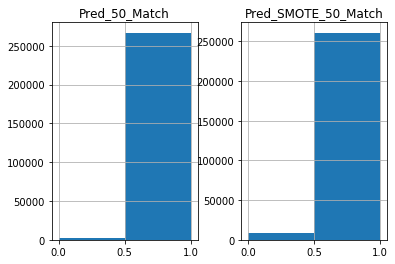

In [22]:
df[['Pred_50_Match','Pred_SMOTE_50_Match']].hist(bins=2)

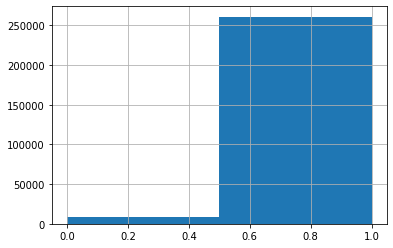

In [4]:
#n=20
#napping

In [25]:
n1=n2=len(df.Pred_SMOTE_50_Match)

In [26]:
n1

269374

### Welch's T-Test

In [ ]:
pred_50_mean=df.Pred_50_Match.mean()
pred_50_std=df.Pred_50_Match.std()
pred_SMOTE_50_mean=df.Pred_SMOTE_50_Match.mean()
pred_SMOTE_50_std=df.Pred_SMOTE_50_Match.std()

#### Pooled Standard Error

In [ ]:
pooled_se = np.sqrt(((((n1-1)*nap_s_bedtime**2) + ((n2-1)*no_nap_s_bedtime**2))/(n1+n2-2))*((1/n1) + (1/n2)))

In [27]:
pooled_se = np.sqrt(((((n1-1)*pred_50_std**2) + ((n2-1)*pred_50_std**2))/(n1+n2-2))*((1/n1) + (1/n2)))

In [28]:
pooled_se

0.00025668214886101644

**Question**: What is the pooled s.e.$(\bar{X}_{same} - \bar{X}_{not\ same})$?

**Question**: Given our sample size of $n$, how many degrees of freedom ($df$) are there for the associated $t$ distribution?

In [29]:
dof=n1+n2-2

In [66]:
dof

538746

**Question**: What is the $t$-test statistic for the hypothesis test?

In [18]:
t_test_statistic=(nap_mean_bedtime-no_nap_mean_bedtime-0)/pooled_se

In [30]:
t_test_statistic=(pred_50_mean-pred_SMOTE_50_mean-0)/pooled_se

In [31]:
t_test_statistic

87.07977245398314

To find the p-value, we can use the function:
```
t.cdf(y, df)
```
Which for $X \sim t(df)$ returns $P(X \leq y)$.

Because of the symmetry of the $t$ distrubution, we have that 
```
1-t.cdf(y, df)
```
returns $P(X > y)$

This function, t.cdf(y, df), will give you the same value as finding the one-tailed probability of y on a t-table with the specified degrees of freedom.

Using the function t.cdf and your $t$-test statistics, find the p-value.

In [32]:
p_val=1-t.cdf(t_test_statistic,dof)

In [33]:
2*p_val<.025

True

In [39]:
p_val

0.0

In [34]:
p_val<.025

True

**Question**: What is the p-value to the nearest hundredth?

Calculate the $t$ test statistics and corresponding p-value using the scipy function scipy.stats.ttest_ind(a, b, equal_var=True) and check with your answer. 

Does scipy.stats.ttest_ind return values for a one-sided or two-sided test? Can you think of a way to recover the results you got using 1-t.cdf from the p-value given by scipy.stats.ttest_ind?

In [35]:
from scipy import stats

In [43]:
stats.ttest_ind(df.Pred_50_Match,df.Pred_SMOTE_50_Match,equal_var=False)

Ttest_indResult(statistic=58.593332827946725, pvalue=0.0)

In [42]:
stats.levene(df.Pred_50_Match,df.Pred_SMOTE_50_Match)

LeveneResult(statistic=3433.1786518865188, pvalue=0.0)